In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
# load all data
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

In [3]:
# mark all missing values
dataset.replace('?', np.NaN, inplace=True)

In [4]:
# unified unit to Kilowatt-Hour and add a column for the remain sub metering
values = dataset.values.astype('float32')
dataset['Global_active_power'] = (values[:,0] / 60)
dataset['Global_reactive_power'] = (values[:,1] / 60)
dataset['Sub_metering_1'] = (values[:,4] / 1000)
dataset['Sub_metering_2'] = (values[:,5] / 1000)
dataset['Sub_metering_3'] = (values[:,6] / 1000)
dataset['Sub_metering_4'] = dataset['Global_active_power'] - dataset['Sub_metering_1'] -dataset['Sub_metering_2'] - dataset['Sub_metering_3']

In [5]:
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [6]:
df = pd.read_csv('household_power_consumption.csv')
df = df.set_index(['datetime'])
df.head()
df.index = pd.to_datetime(df.index) # df.index = pd.to_datetime(df['datetime'])
df_d = df.groupby(pd.Grouper(freq='D')).sum()
df_d.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16,20.152933,0.582033,93552.53,5180.8,0.000,0.546,4.926,14.680933
2006-12-17,56.507667,3.766767,345725.32,14398.6,2.033,4.187,13.341,36.946667
2006-12-18,36.730433,2.696533,347373.64,9247.2,1.063,2.621,14.018,19.028433
2006-12-19,27.769900,2.515700,348479.01,7094.0,0.839,7.602,6.197,13.131900
2006-12-20,37.095800,2.683300,348923.61,9313.0,0.000,2.648,14.063,20.384800


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


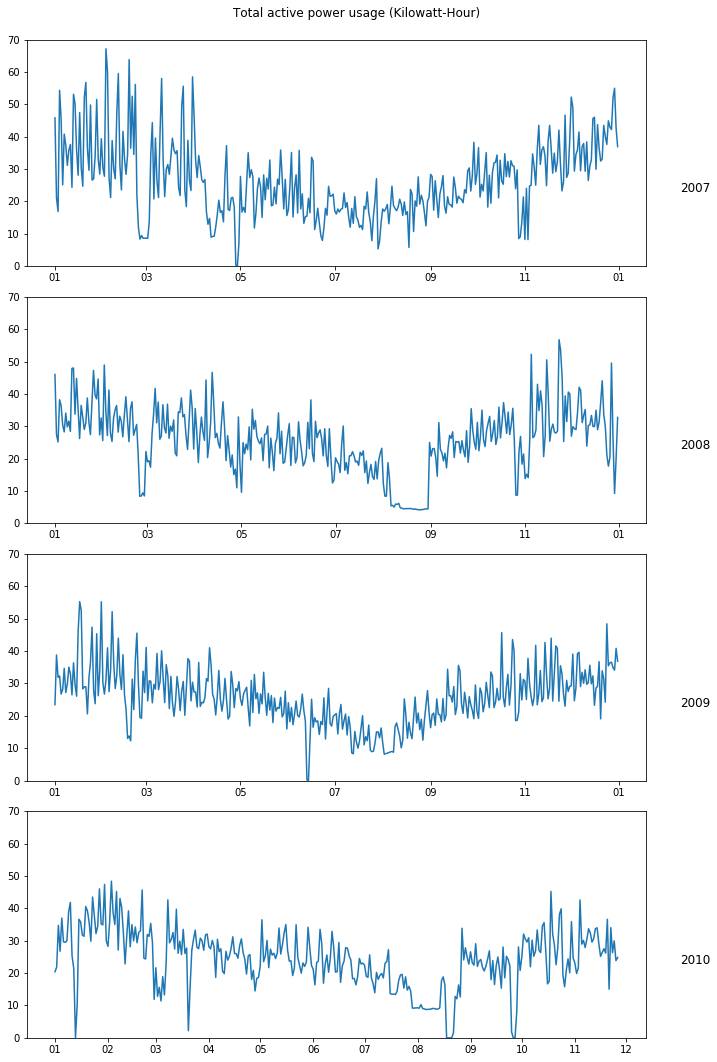

In [7]:
# plot Global_active_power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = df_d[str(year)]
    # plot the active power for the year
    plt.plot(result['Global_active_power'])
    # add a title to the subplot
    plt.title(str(year), x=1.08, y = 0.3)
    ax.set_ylim(0,70)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Total active power usage (Kilowatt-Hour)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

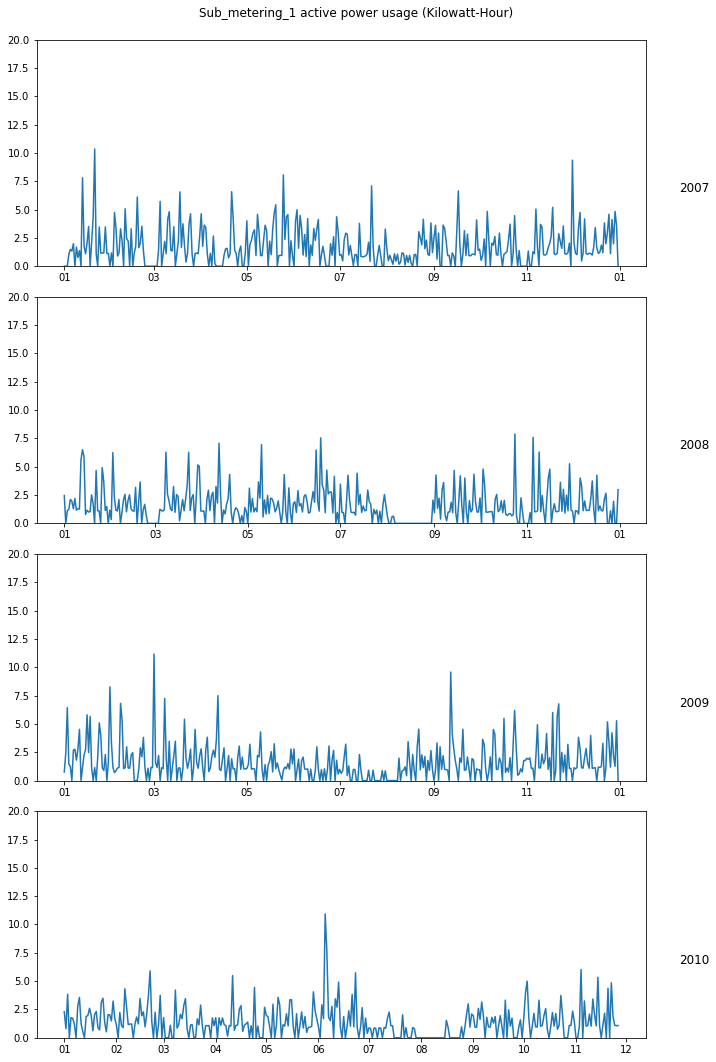

In [13]:
# plot Sub_metering_1 for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = df_d[str(year)]
    # plot the active power for the year
    plt.plot(result['Sub_metering_1'])
    # add a title to the subplot
    plt.title(str(year), x=1.08, y = 0.3)
    ax.set_ylim(0,20)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Sub_metering_1 active power usage (Kilowatt-Hour)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

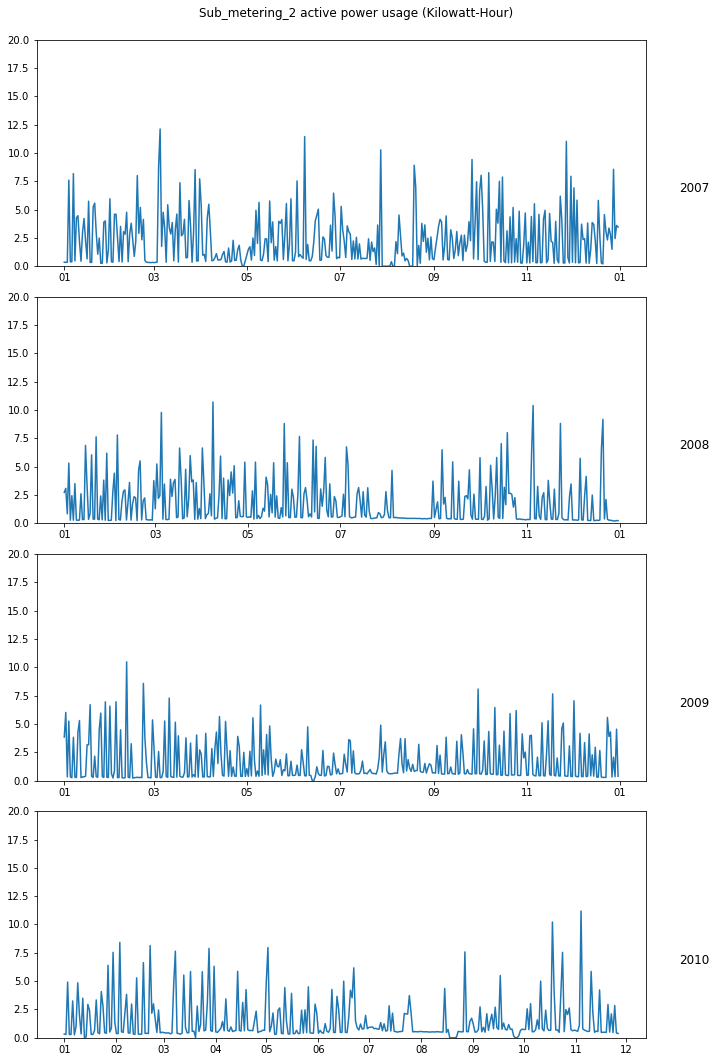

In [14]:
# plot Sub_metering_2 for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = df_d[str(year)]
    # plot the active power for the year
    plt.plot(result['Sub_metering_2'])
    # add a title to the subplot
    plt.title(str(year), x=1.08, y = 0.3)
    ax.set_ylim(0,20)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Sub_metering_2 active power usage (Kilowatt-Hour)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

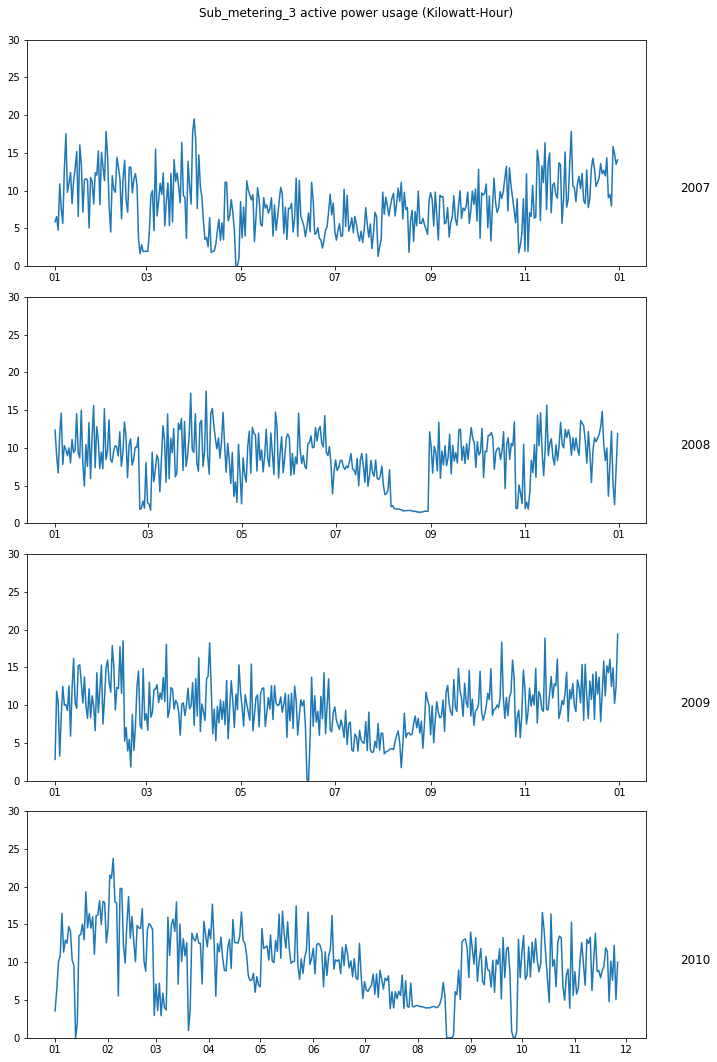

In [15]:
# plot Sub_metering_3 for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = df_d[str(year)]
    # plot the active power for the year
    plt.plot(result['Sub_metering_3'])
    # add a title to the subplot
    plt.title(str(year), x=1.08, y = 0.3)
    ax.set_ylim(0,30)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Sub_metering_3 active power usage (Kilowatt-Hour)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

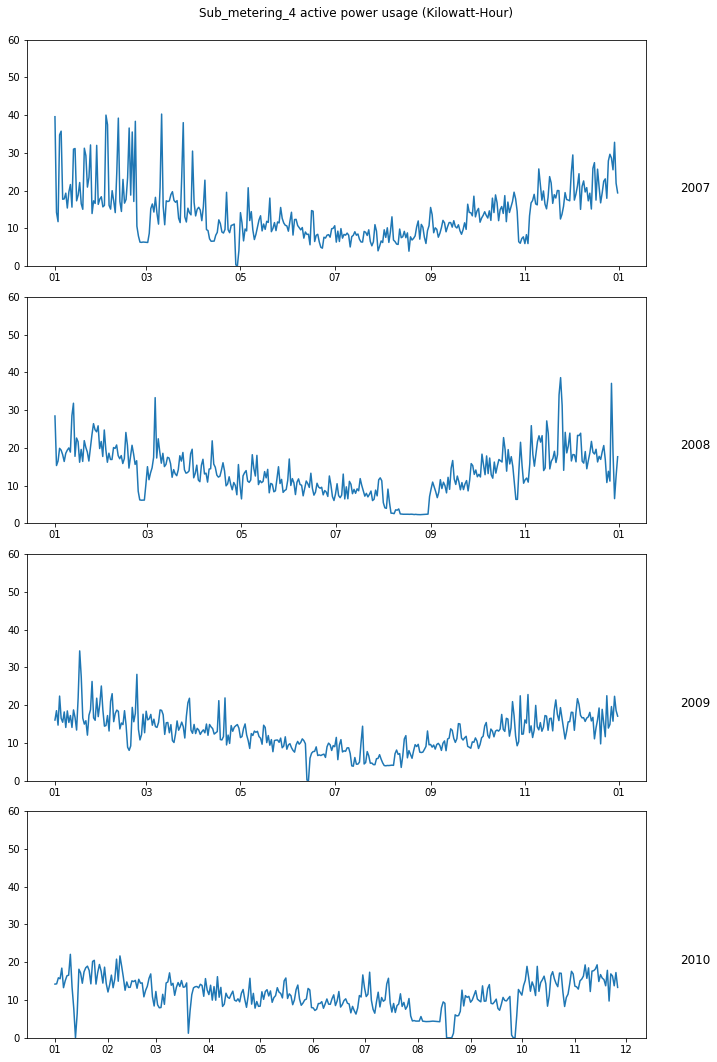

In [16]:
# plot Sub_metering_4 for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = df_d[str(year)]
    # plot the active power for the year
    plt.plot(result['Sub_metering_4'])
    # add a title to the subplot
    plt.title(str(year), x=1.08, y = 0.3)
    ax.set_ylim(0,60)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Sub_metering_4 active power usage (Kilowatt-Hour)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [9]:
climate = pd.read_csv('climate.csv')
climate.index = pd.to_datetime(climate['DATE'])
climate.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,
2006-01-01,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,2006-01-01,0.02,",,S",NaN,NaN,42,"H,,S",NaN,NaN,37.0,",,S"
2006-01-02,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,2006-01-02,0.33,",,S",NaN,NaN,41,"H,,S",44.0,",,S",39.0,",,S"
2006-01-03,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,2006-01-03,0.00,",,S",NaN,NaN,42,"H,,S",44.0,",,S",40.0,",,S"
2006-01-04,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,2006-01-04,0.06,",,S",NaN,NaN,37,"H,,S",42.0,",,S",NaN,NaN
2006-01-05,FR000007150,"PARIS LE BOURGET, FR",48.8231,2.3367,75.0,2006-01-05,0.01,",,S",NaN,NaN,34,"H,,S",35.0,",,S",32.0,",,S"


In [11]:
# PRCP: precipitation; SNWD: snow depth; TAVG: average temperature; 
# TMAX: maximum temperature; TMIN: minimum temperature
# slice climate data containing temperature and precipitation only

climate_TP = climate.loc['2006-12-16':'2010-11-26', ['PRCP','SNWD','TAVG','TMAX','TMIN']]
climate_TP.head()

,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,
2006-12-16,0.00,NaN,43,47.0,39.0
2006-12-17,0.13,NaN,40,46.0,34.0
2006-12-18,0.00,NaN,40,43.0,NaN
2006-12-19,0.00,NaN,37,41.0,33.0
2006-12-20,0.00,NaN,37,42.0,33.0


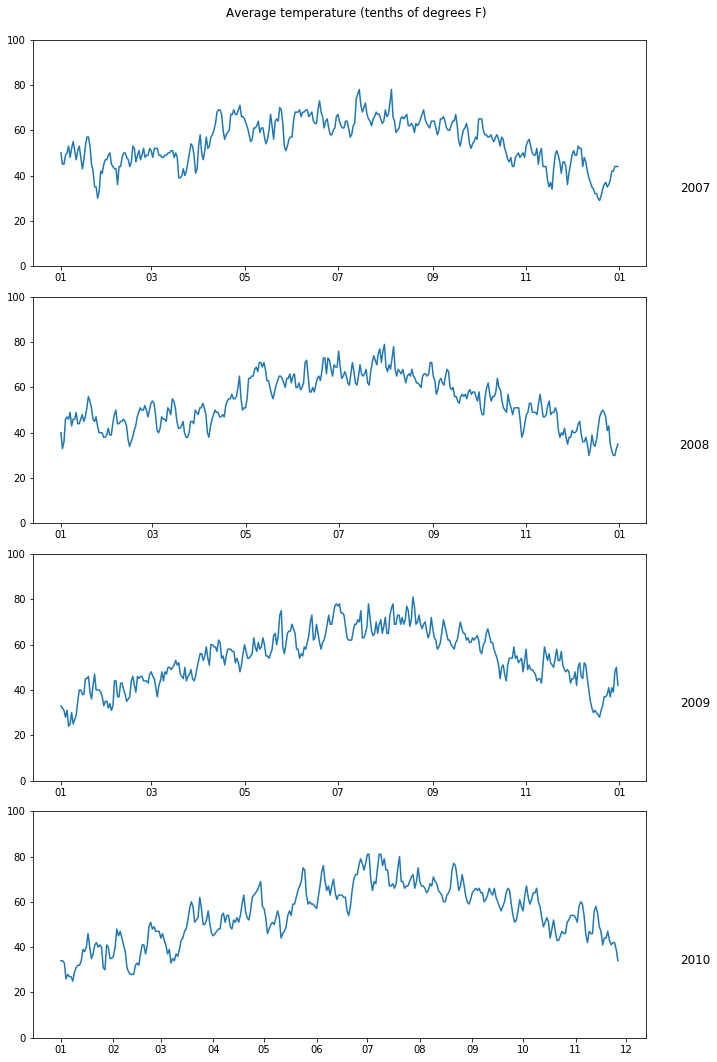

In [12]:
# TAVG: average temperature
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = climate_TP[str(year)]
    # plot the active power for the year
    plt.plot(result['TAVG'])
    # add a title to the subplot
    plt.title(str(year), x=1.08, y = 0.3)
    ax.set_ylim(0,100)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Average temperature (tenths of degrees F)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

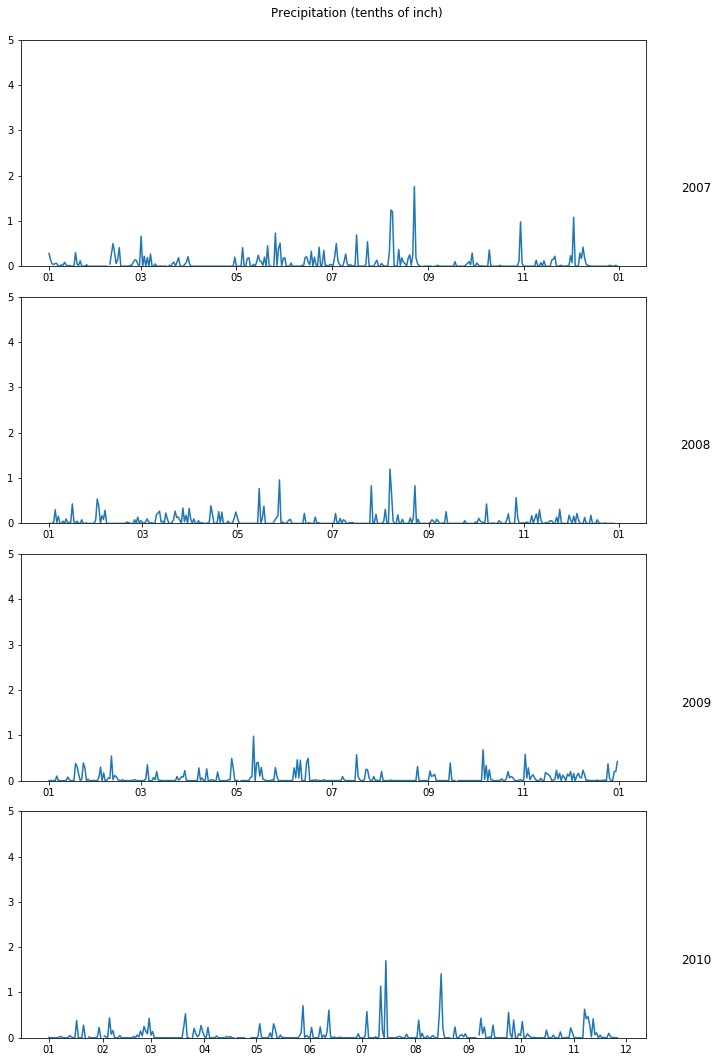

In [17]:
# PRCP: precipitation
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = climate_TP[str(year)]
    # plot the active power for the year
    plt.plot(result['PRCP'])
    # add a title to the subplot
    plt.title(str(year), x=1.08, y = 0.3)
    ax.set_ylim(0,5)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Precipitation (tenths of inch)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

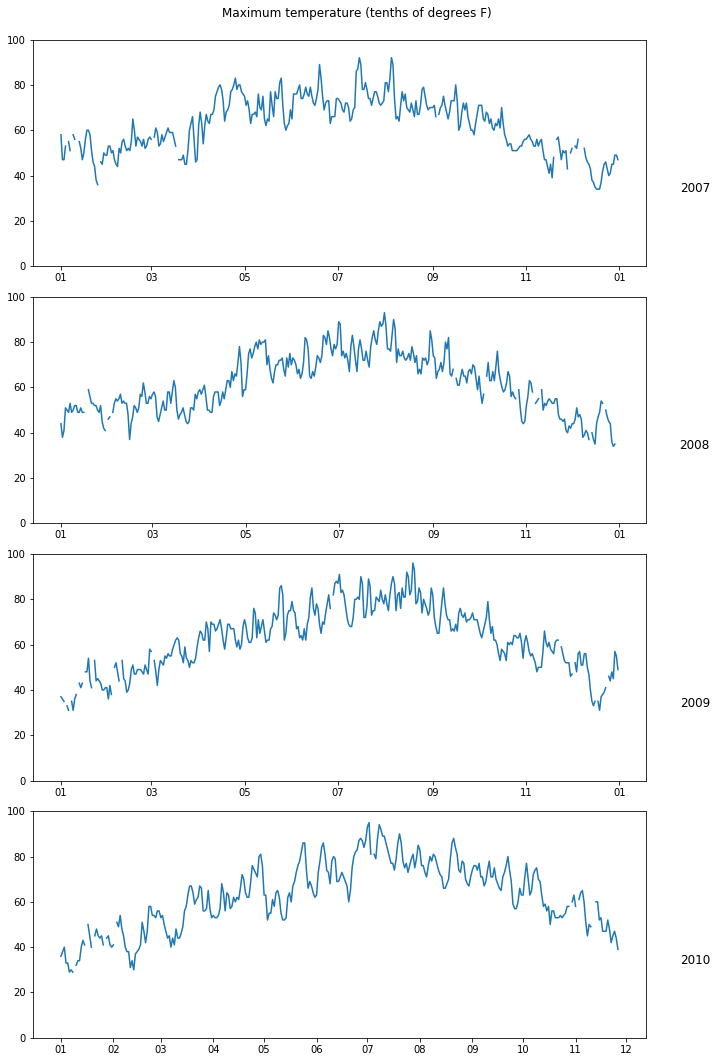

In [18]:
# TMAX: maximum temperature
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = climate_TP[str(year)]
    # plot the active power for the year
    plt.plot(result['TMAX'])
    # add a title to the subplot
    plt.title(str(year), x=1.08, y = 0.3)
    ax.set_ylim(0,100)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Maximum temperature (tenths of degrees F)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

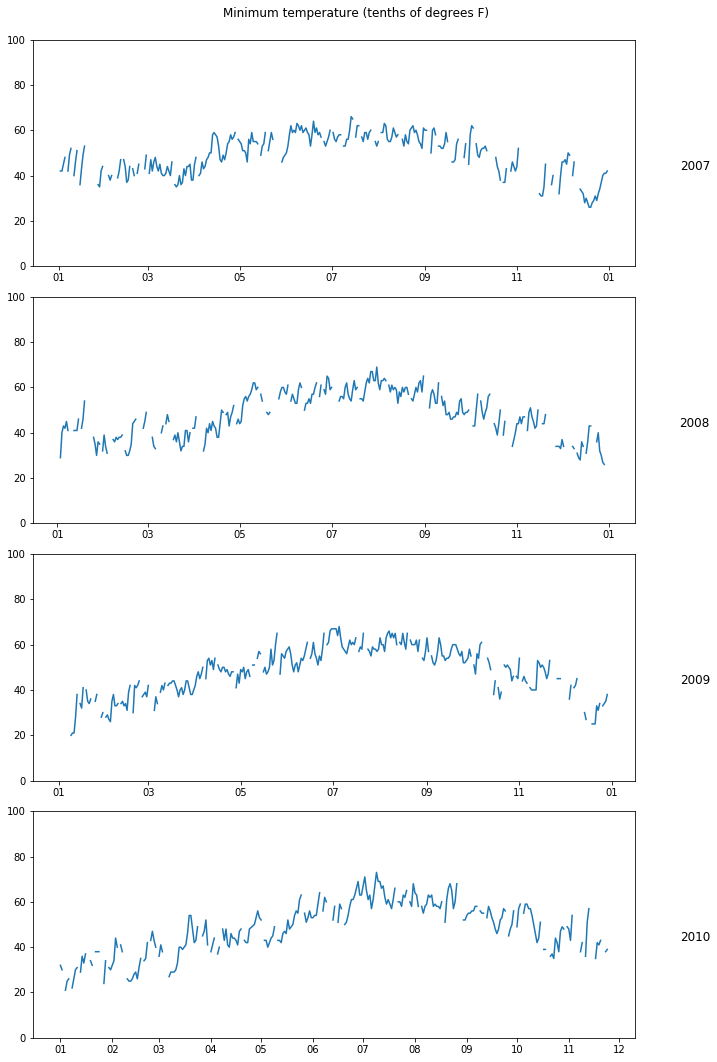

In [19]:
# TMIN: minimum temperature
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10, 15))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = climate_TP[str(year)]
    # plot the active power for the year
    plt.plot(result['TMIN'])
    # add a title to the subplot
    plt.title(str(year), x=1.1, y = 0.4)
    ax.set_ylim(0,100)
    ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.suptitle('Minimum temperature (tenths of degrees F)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()